IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Hoang Thuy Duong VU | 21110221

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

### Chargement des données

In [1]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.

![](poster.png)


# Expérimentations

In [3]:
# Définition de variables
X_noms = X.columns

dim = len(X)
nb_labels = len(np.unique(y))

## Prétraitement de données

### Extraction de données
Vu que l'apprentissage non supervisé ne nécessite pas toujours une grande quantité de données, et qu'elle est donc nuancée pour le clustering, on va juste extraire 500 données de la base de départ pour l'apprentissage.

### Normalisation de données

In [5]:
import random 

index = random.sample(range(len(X)),100)
X_norm = clust.normalisation(X.iloc[index])
y_target = y.iloc[index]

print("Les valeurs uniques de y_target :",np.unique(y_target))

Les valeurs uniques de y_target : [0 1 2 3 4 5 6 7 8 9]


### Réduction de 16D à 2D et 3D

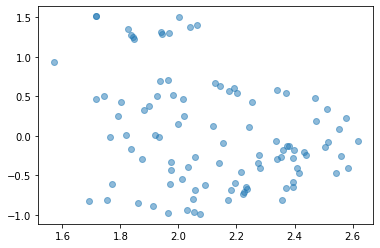

In [6]:
# 1) calcul des vecteurs propres
lam_train, V_train = np.linalg.eig(X_norm.T @ X_norm)

# Trouver les indices des deux plus grandes valeurs propres
largest_indices = np.argsort(lam_train)[::-1][:2]

# Extraire les deux plus grandes valeurs propres et leurs vecteurs propres correspondants
largest_eigenvalues = lam_train[largest_indices]


max_train = V_train[:, largest_indices]

# 4) affichage (plot)
X_projected_2D = np.dot(X_norm, max_train)

plt.scatter(X_projected_2D[:,0], X_projected_2D[:,1],alpha=.5)
# ####################################

#plt.savefig("out/proj_usps_all.png",bbox_inches='tight', transparent=True,pad_inches=0)


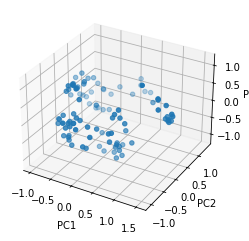

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import random

# Perform PCA to reduce the dimensionality to 3D
pca = PCA(n_components=3)
X_projected_3D = pca.fit_transform(X_norm)

# Plot the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_projected_3D[:, 0], X_projected_3D[:, 1], X_projected_3D[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


## Clustering hiérachique

### Algorithme de classification hiérarchique

#### Linkage = centroid

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98], 99: [99]}
fusionne: distance 

[[73, 80, 0.16703653792446568, 2],
 [14, 34, 0.17890019617396838, 2],
 [56, 66, 0.20941295361745543, 2],
 [13, 27, 0.22574123317801129, 2],
 [1, 62, 0.2566650169489714, 2],
 [64, 67, 0.25979047885759915, 2],
 [101, 105, 0.24995026493425238, 4],
 [5, 48, 0.2693615803994847, 2],
 [16, 19, 0.2979924325347452, 2],
 [38, 78, 0.303914727571701, 2],
 [2, 106, 0.3089665584738807, 5],
 [18, 24, 0.3113382722102816, 2],
 [76, 111, 0.31107948748007186, 3],
 [70, 93, 0.31381594017147485, 2],
 [8, 44, 0.3159924527248659, 2],
 [92, 107, 0.3189513792126047, 3],
 [6, 102, 0.32028463034589144, 3],
 [86, 89, 0.3400669306484136, 2],
 [10, 36, 0.36447031689706477, 2],
 [9, 61, 0.37318128062803857, 2],
 [39, 46, 0.38061024898835977, 2],
 [91, 115, 0.3980332183271111, 4],
 [47, 103, 0.4080402722063124, 3],
 [37, 82, 0.4115065899971847, 2],
 [85, 120, 0.41511953717083916, 3],
 [23, 94, 0.4323457215429517, 2],
 [4, 109, 0.4368231684871577, 3],
 [3, 123, 0.43899076371263207, 3],
 [28, 98, 0.4422935151387221, 2]

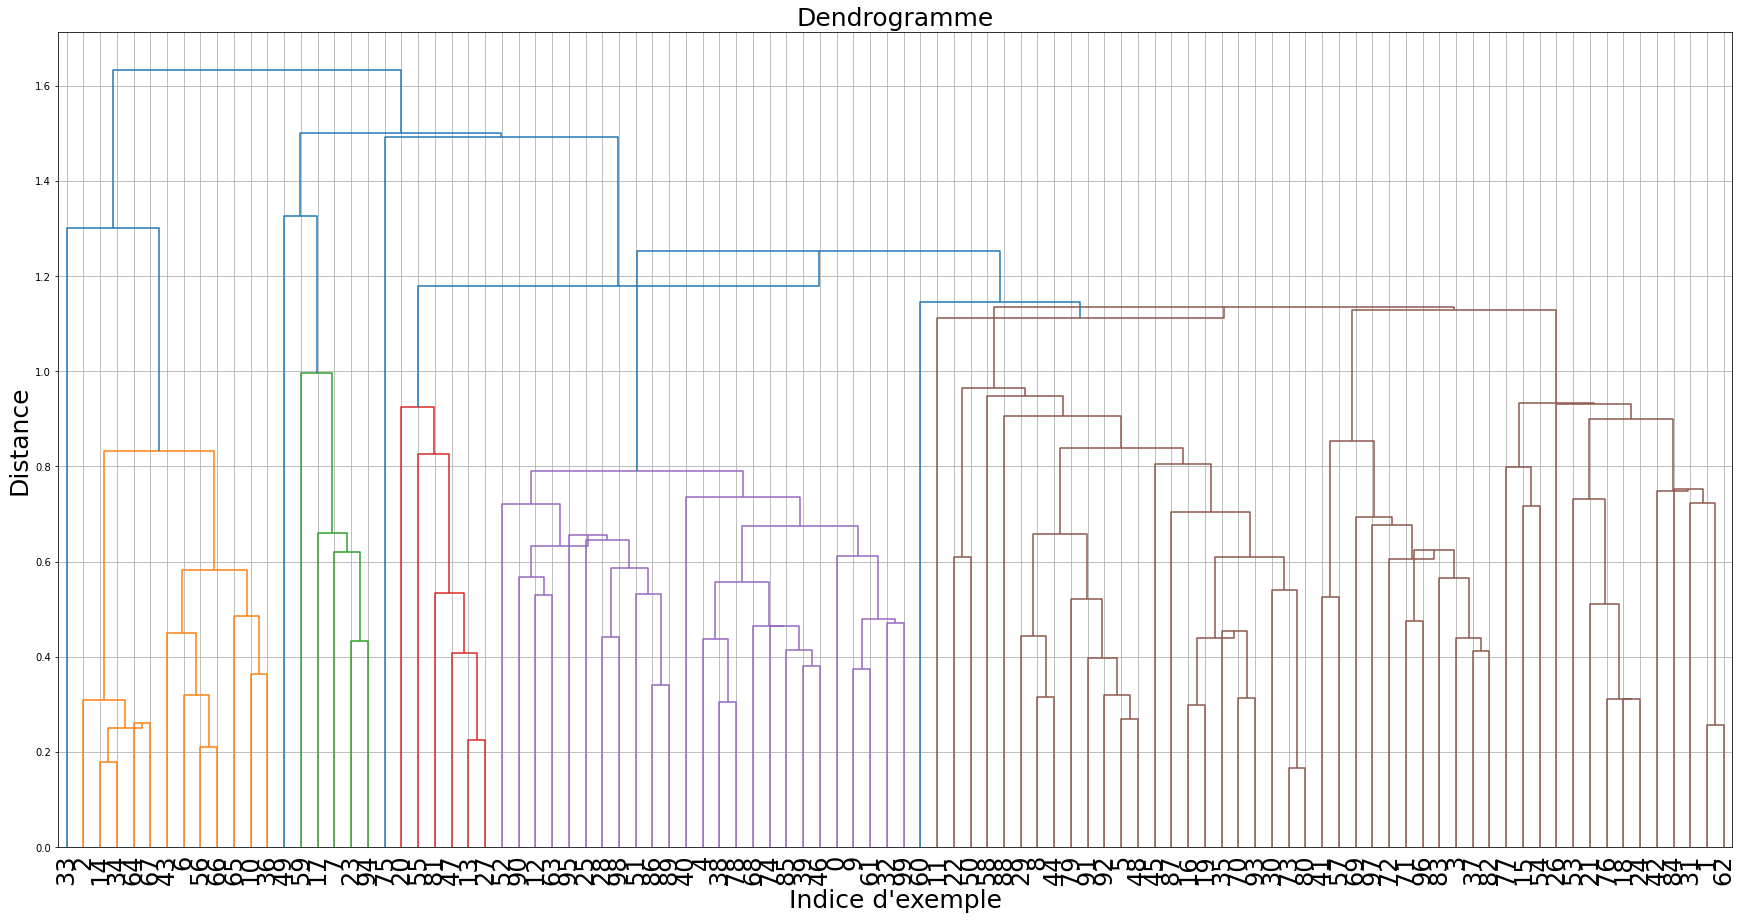

In [8]:
clust.CHA(pd.DataFrame(X_norm),linkage='centroid',dendrogramme=True,verbose=True)

#### Linkage = complete

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98], 99: [99]}
fusionne: distance 

[[73, 80, 0.16703653792446568, 2],
 [14, 34, 0.17890019617396838, 2],
 [56, 66, 0.20941295361745543, 2],
 [13, 27, 0.22574123317801129, 2],
 [1, 62, 0.2566650169489714, 2],
 [64, 67, 0.25979047885759915, 2],
 [5, 48, 0.2693615803994847, 2],
 [16, 19, 0.2979924325347452, 2],
 [38, 78, 0.303914727571701, 2],
 [18, 24, 0.3113382722102816, 2],
 [70, 93, 0.31381594017147485, 2],
 [8, 44, 0.3159924527248659, 2],
 [101, 105, 0.33748511001973697, 4],
 [86, 89, 0.3400669306484136, 2],
 [6, 102, 0.35498512591474574, 3],
 [91, 92, 0.36274432508522814, 2],
 [10, 36, 0.36447031689706477, 2],
 [9, 61, 0.37318128062803857, 2],
 [76, 109, 0.37919239343323957, 3],
 [39, 46, 0.38061024898835977, 2],
 [37, 82, 0.4115065899971847, 2],
 [2, 112, 0.41738656566758076, 5],
 [23, 94, 0.4323457215429517, 2],
 [28, 98, 0.4422935151387221, 2],
 [47, 103, 0.4464995645879716, 3],
 [32, 99, 0.47167608664334776, 2],
 [71, 96, 0.4746667325023362, 2],
 [106, 115, 0.47530531776105855, 4],
 [35, 110, 0.4804665002658551, 

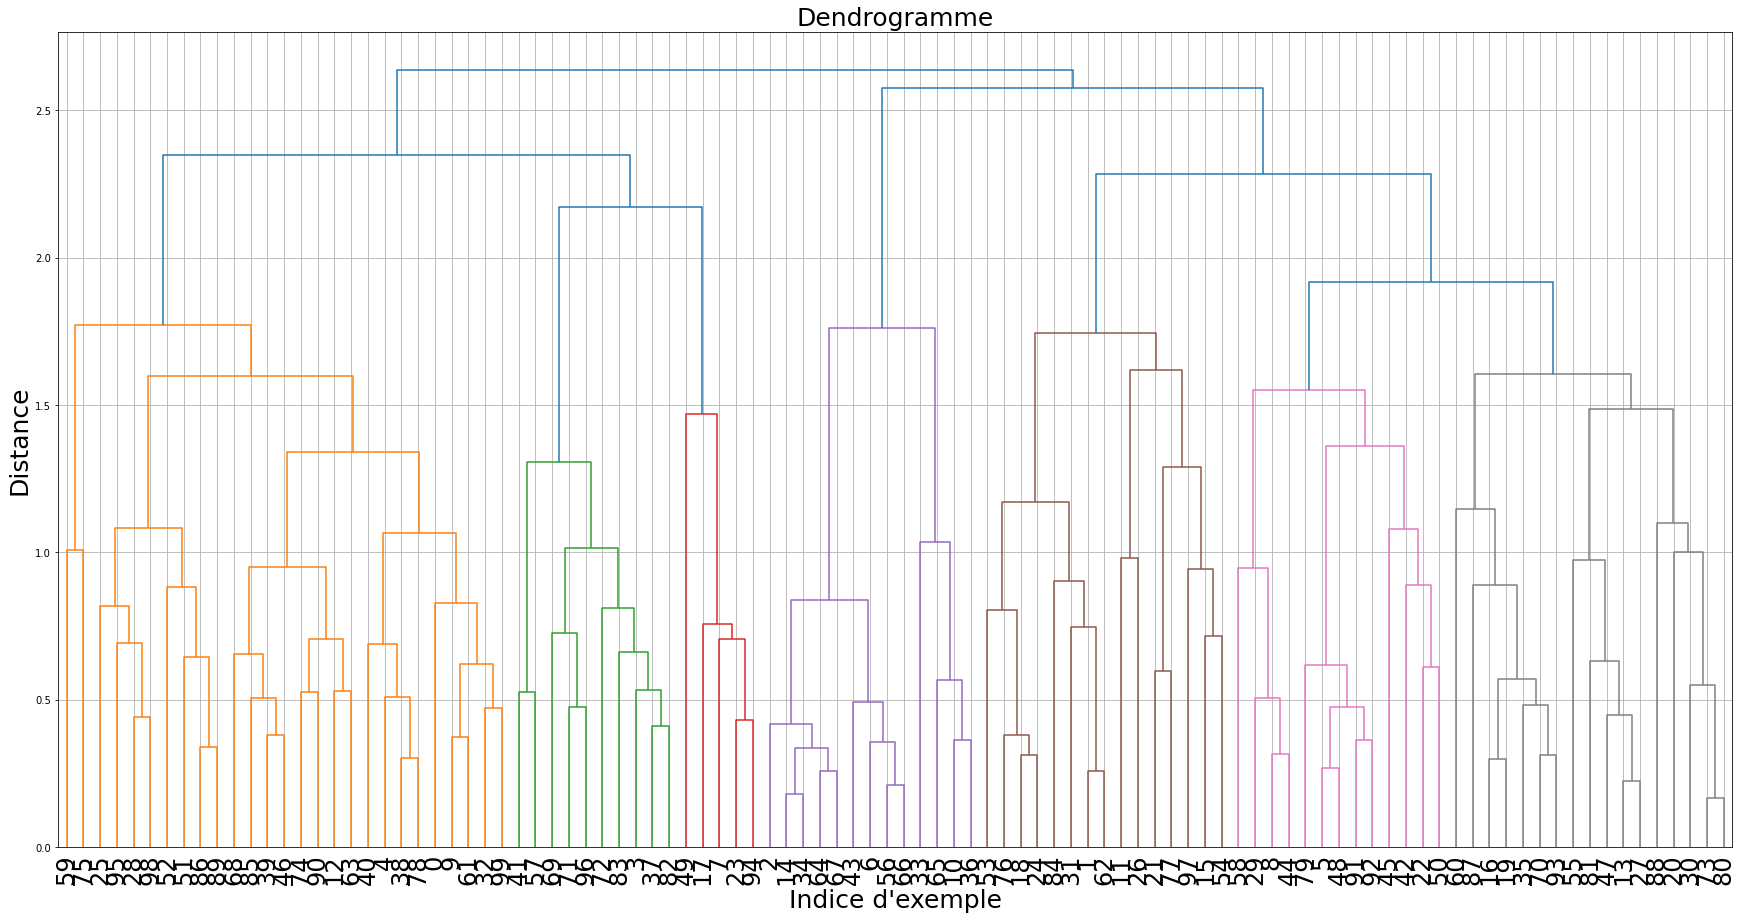

In [9]:
clust.CHA(pd.DataFrame(X_norm),linkage='complete',dendrogramme=True,verbose=True)

#### Linkage = simple

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98], 99: [99]}
fusionne: distance 

[[73, 80, 0.16703653792446568, 2],
 [14, 34, 0.17890019617396838, 2],
 [56, 66, 0.20941295361745543, 2],
 [13, 27, 0.22574123317801129, 2],
 [2, 101, 0.2485814616432644, 3],
 [1, 62, 0.2566650169489714, 2],
 [67, 104, 0.2587401686045388, 4],
 [64, 106, 0.25979047885759915, 5],
 [5, 48, 0.2693615803994847, 2],
 [92, 108, 0.28499608201376897, 3],
 [16, 19, 0.2979924325347452, 2],
 [38, 78, 0.303914727571701, 2],
 [18, 24, 0.3113382722102816, 2],
 [76, 112, 0.3134003568848339, 3],
 [70, 93, 0.31381594017147485, 2],
 [8, 44, 0.3159924527248659, 2],
 [6, 102, 0.3179260005446142, 3],
 [86, 89, 0.3400669306484136, 2],
 [91, 109, 0.36274432508522814, 4],
 [10, 36, 0.36447031689706477, 2],
 [9, 61, 0.37318128062803857, 2],
 [39, 46, 0.38061024898835977, 2],
 [47, 103, 0.39888772666694, 3],
 [85, 121, 0.40325946002075136, 3],
 [21, 113, 0.4055445205943656, 4],
 [4, 111, 0.4084172678419353, 3],
 [37, 82, 0.4115065899971847, 2],
 [68, 123, 0.4229833614746577, 4],
 [74, 127, 0.4239257549542232, 5],

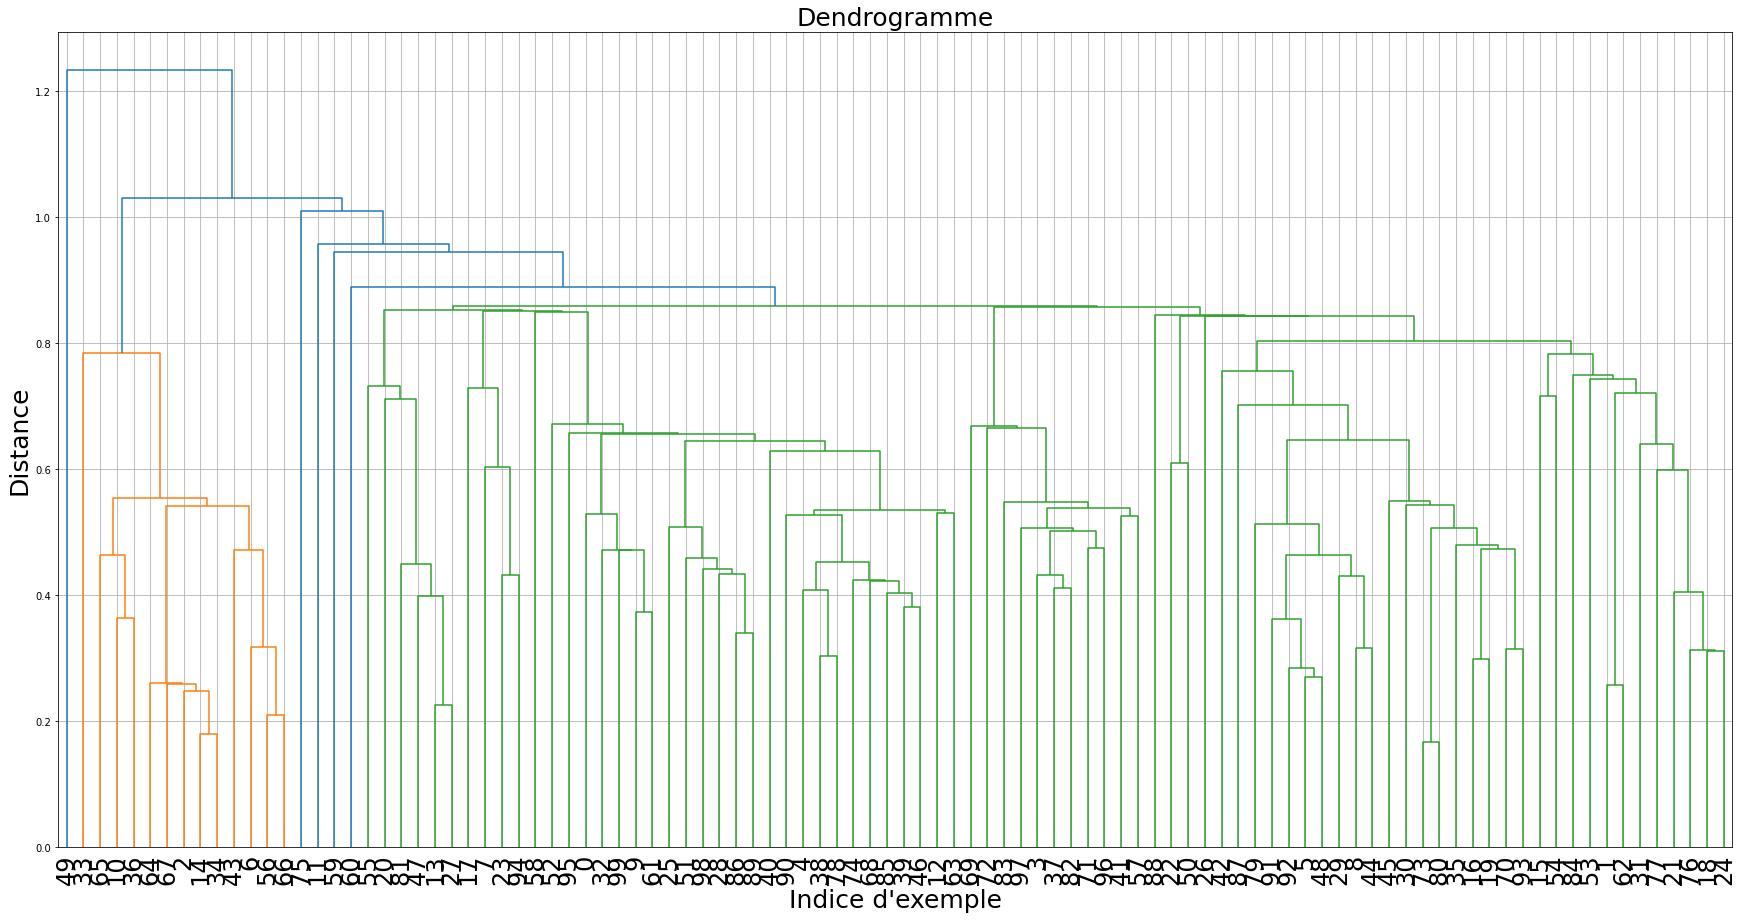

In [10]:
clust.CHA(pd.DataFrame(X_norm),linkage='simple',dendrogramme=True,verbose=True)

#### Linkage = average

{0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98], 99: [99]}
fusionne: distance 

[[73, 80, 0.16703653792446568, 2],
 [14, 34, 0.17890019617396838, 2],
 [56, 66, 0.20941295361745543, 2],
 [13, 27, 0.22574123317801129, 2],
 [1, 62, 0.2566650169489714, 2],
 [64, 67, 0.25979047885759915, 2],
 [5, 48, 0.2693615803994847, 2],
 [101, 105, 0.2942018149281655, 4],
 [16, 19, 0.2979924325347452, 2],
 [38, 78, 0.303914727571701, 2],
 [18, 24, 0.3113382722102816, 2],
 [70, 93, 0.31381594017147485, 2],
 [8, 44, 0.3159924527248659, 2],
 [6, 102, 0.33645556322967995, 3],
 [86, 89, 0.3400669306484136, 2],
 [92, 106, 0.3415677702085518, 3],
 [2, 107, 0.3460938827633468, 5],
 [76, 110, 0.3462963751590368, 3],
 [10, 36, 0.36447031689706477, 2],
 [9, 61, 0.37318128062803857, 2],
 [39, 46, 0.38061024898835977, 2],
 [37, 82, 0.4115065899971847, 2],
 [47, 103, 0.4226936456274558, 3],
 [23, 94, 0.4323457215429517, 2],
 [91, 115, 0.43636741602783485, 4],
 [28, 98, 0.4422935151387221, 2],
 [85, 120, 0.45385103611035904, 3],
 [4, 109, 0.45965255007495387, 3],
 [29, 112, 0.468947088173746, 3],

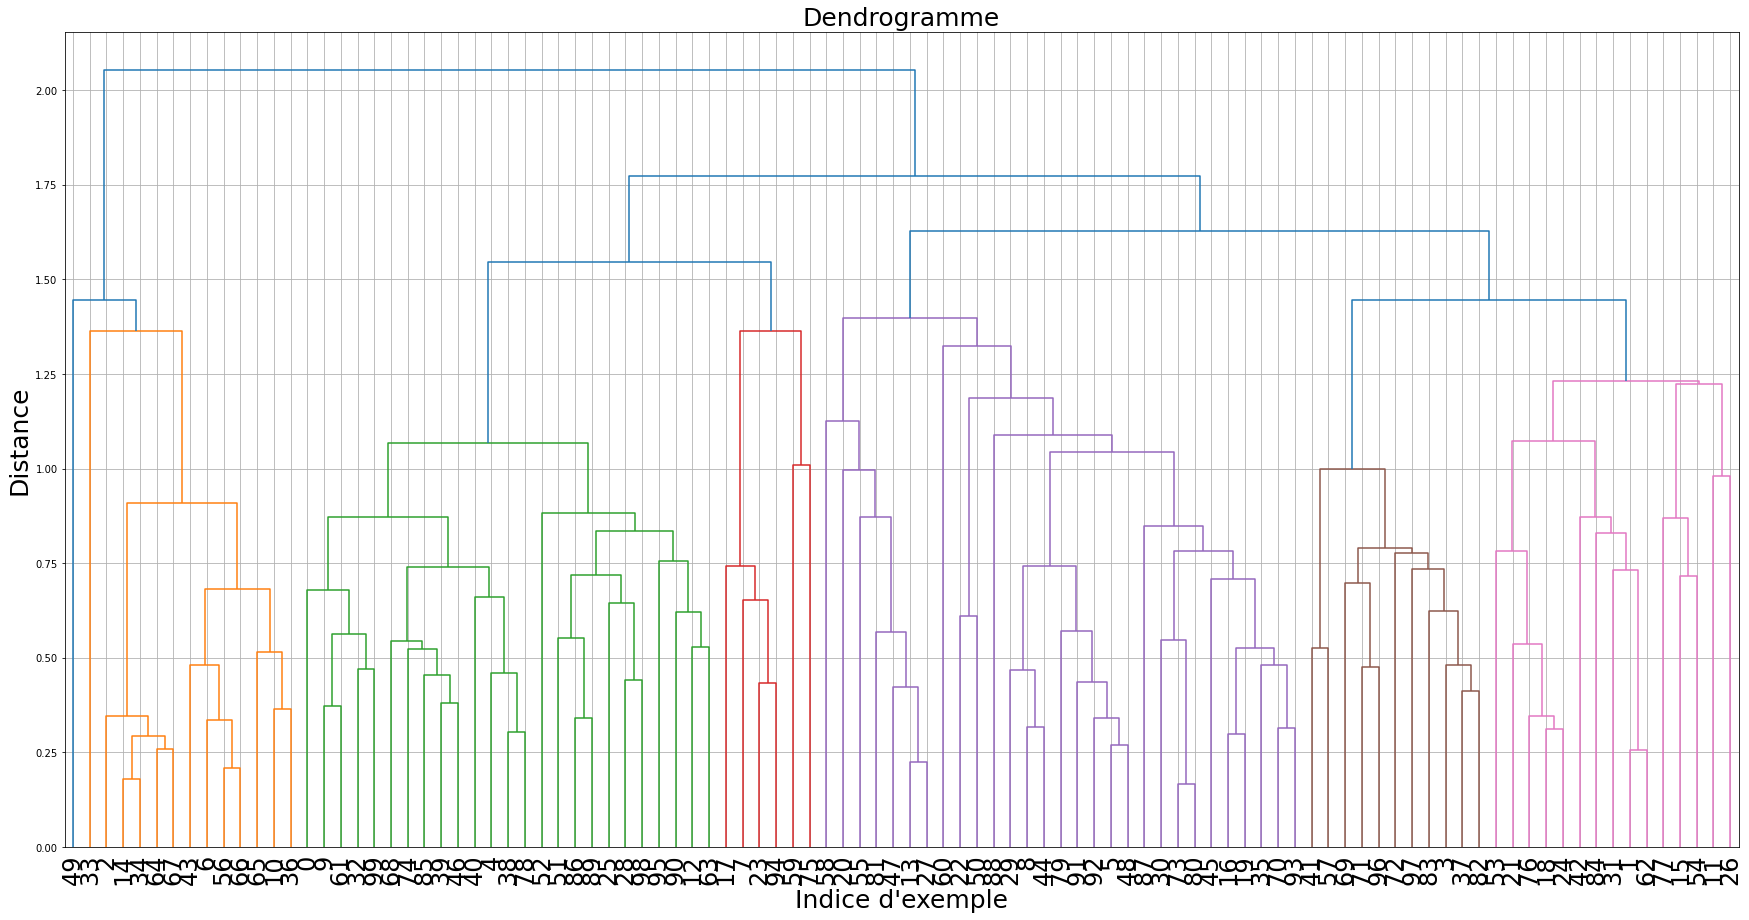

In [11]:
clust.CHA(pd.DataFrame(X_norm),linkage='average',dendrogramme=True,verbose=True)

## Algorithme des K-moyennes

### Normalisation de données

Pour l'algorithme des K-moyennes, nous allons utiliser toutes les données de la base pendataset.

In [98]:
X_norm = clust.normalisation(X)

In [100]:
print(f"inertie de la base de données : {clust.inertie_cluster(X_norm):1.4f}")

inertie de la base de données : 16348.8518


On a constaté que le modèle a une inertie très élevée de 16348.8518. Par conséquent, ce n'est pas un bon ajustement du modèle aux données.

### The Elbow method

Le méthode du coude *(ou The Elbow method)* est utilisée pour déterminer le nombre optimal de clusters dans le clustering K-means. La méthode du coude trace la valeur de la fonction de coût produite par différentes valeurs de K.

Si K augmente, la distorsion moyenne diminuera. Ensuite, chaque cluster aura moins d'instances constitutives, et les instances seront plus proches de leurs centroïdes respectifs. Cependant, les améliorations de la distorsion moyenne diminueront à mesure que K augmente. La valeur de K à laquelle l'amélioration de la distorsion diminue le plus est appelée le coude, auquel nous devrions arrêter de diviser les données en clusters supplémentaires.

Dans ce projet, comme la version de la fonction qui calcule l'inertie n'est pas adaptée pour chaque valeur de K dans l'algorithme de K-moyennes, on va utiliser la classe `KMeans` de la librairie `sklearn.cluster`.

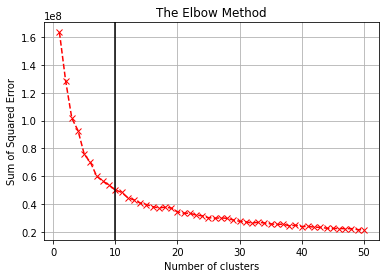

In [92]:
from sklearn.cluster import KMeans

cs = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 51), cs, linestyle="--",marker='x',color='r')
plt.axvline(x=10, color='black', linestyle='-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error')
plt.grid()
plt.show()

On a appliqué la méthode du coude et on a constaté que $k=10$ (où $k$ est le nombre de clusters) peut être considéré comme un bon nombre de clusters pour regrouper ces données.

In [55]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = clust.init_kmeans(10,X)

pp = []
# Exemple (vérifier le résultat avec l'affichage graphique réalisé précédemment):
for i in range(0,len(X)):
    pproche = clust.plus_proche(X.iloc[i],Centroides_test)
    print("L'exemple ",i," est le plus proche du centroide ",pproche)
    pp.append(pproche)

L'exemple  0  est le plus proche du centroide  0
L'exemple  1  est le plus proche du centroide  4
L'exemple  2  est le plus proche du centroide  3
L'exemple  3  est le plus proche du centroide  4
L'exemple  4  est le plus proche du centroide  3
L'exemple  5  est le plus proche du centroide  1
L'exemple  6  est le plus proche du centroide  0
L'exemple  7  est le plus proche du centroide  0
L'exemple  8  est le plus proche du centroide  9
L'exemple  9  est le plus proche du centroide  0
L'exemple  10  est le plus proche du centroide  8
L'exemple  11  est le plus proche du centroide  0
L'exemple  12  est le plus proche du centroide  8
L'exemple  13  est le plus proche du centroide  1
L'exemple  14  est le plus proche du centroide  5
L'exemple  15  est le plus proche du centroide  3
L'exemple  16  est le plus proche du centroide  3
L'exemple  17  est le plus proche du centroide  8
L'exemple  18  est le plus proche du centroide  2
L'exemple  19  est le plus proche du centroide  9
L'exemple 

### K-Means model with different clusters

**ATTENTION** : Les données de la visualisation 2D a déjà passées par l'étape de réduction de dimension avec la base de départ en 16D, cette résultat n'est qu'à titre représentatif.

#### Pour K = 8 :

In [89]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(8, X, 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

s = 0
for (k,v) in l_affectation.items() : 
  target = y.iloc[v]
  s += sum(np.array(target) == k)

print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))

Iteration 1 Inertie : 76655785.50363967 Différence : 3599501.086018458
Iteration 2 Inertie : 73940062.66263828 Différence : 2715722.8410013914
Iteration 3 Inertie : 68016686.89076442 Différence : 5923375.771873862
Iteration 4 Inertie : 64259399.48016342 Différence : 3757287.4106009975
Iteration 5 Inertie : 60276479.5165356 Différence : 3982919.9636278152
Iteration 6 Inertie : 59094042.67712368 Différence : 1182436.8394119218
Iteration 7 Inertie : 58691019.9632531 Différence : 403022.7138705775
Iteration 8 Inertie : 58514940.210887924 Différence : 176079.75236517936
Iteration 9 Inertie : 58418441.10411798 Différence : 96499.10676994175
Iteration 10 Inertie : 58348847.149609916 Différence : 69593.95450806618
Iteration 11 Inertie : 58287361.690413006 Différence : 61485.45919691026
Iteration 12 Inertie : 58220472.88351277 Différence : 66888.80690023303
Iteration 13 Inertie : 58140170.46277986 Différence : 80302.4207329154
Iteration 14 Inertie : 58035706.03307665 Différence : 104464.4297032

/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/634881055.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/634881055.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))


##### Visualisation

Iteration 1 Inertie : 4.690422686828516 Différence : 3.0775591378502636
Iteration 2 Inertie : 3.820024341080403 Différence : 0.8703983457481126
Iteration 3 Inertie : 3.425592010398492 Différence : 0.3944323306819113
Iteration 4 Inertie : 3.083888515561361 Différence : 0.3417034948371307
Iteration 5 Inertie : 3.050412313355377 Différence : 0.03347620220598424
Affichage des centres: 
 [[ 1.98034328  0.53409675]
 [ 1.87000031  1.32572145]
 [ 2.41885185 -0.24894295]
 [ 1.98766849 -0.3444811 ]
 [ 2.23888056 -0.66588008]
 [ 1.92150219 -0.83897008]
 [ 2.44397551  0.35985129]
 [ 1.97646662  0.07910145]]
Affichage des affectations: 
 {0: [1, 3, 21, 31, 37, 49, 53, 62, 69, 71, 72, 77, 83, 96, 97], 1: [2, 6, 10, 14, 33, 34, 36, 43, 56, 64, 65, 66, 67], 2: [5, 13, 16, 19, 20, 35, 45, 47, 48, 50, 60, 70, 73, 79, 80, 81, 88, 91, 92, 93, 98], 3: [0, 9, 27, 40, 41, 61, 75, 87], 4: [8, 12, 28, 29, 32, 44, 51, 55, 58, 63, 86, 89, 95, 99], 5: [4, 25, 38, 39, 46, 52, 68, 74, 78, 85, 90], 6: [11, 15, 18, 2

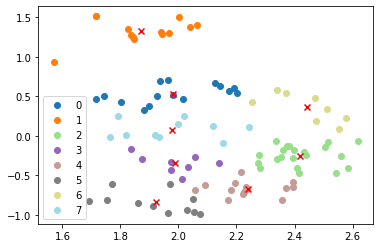

In [94]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(8, pd.DataFrame(X_projected_2D), 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

clust.affiche_resultat(pd.DataFrame(X_projected_2D),les_centres,l_affectation)

#### Pour K = 10 :

In [88]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(10, X, 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

s = 0
for (k,v) in l_affectation.items() : 
  target = y.iloc[v]
  s += sum(np.array(target) == k)

print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))

Iteration 1 Inertie : 64809750.88708331 Différence : 8465059.424776897
Iteration 2 Inertie : 58382708.77084716 Différence : 6427042.11623615
Iteration 3 Inertie : 54905841.97055419 Différence : 3476866.8002929688
Iteration 4 Inertie : 54229111.325025745 Différence : 676730.6455284432
Iteration 5 Inertie : 53857369.59591936 Différence : 371741.72910638154
Iteration 6 Inertie : 53533112.648604296 Différence : 324256.94731506705
Iteration 7 Inertie : 53233607.723624915 Différence : 299504.92497938126
Iteration 8 Inertie : 52955893.198908105 Différence : 277714.5247168094
Iteration 9 Inertie : 52663678.379906446 Différence : 292214.81900165975
Iteration 10 Inertie : 52332825.29064908 Différence : 330853.08925736696
Iteration 11 Inertie : 52065864.811958276 Différence : 266960.47869080305
Iteration 12 Inertie : 51923741.5639347 Différence : 142123.24802357703
Iteration 13 Inertie : 51845963.12288677 Différence : 77778.44104792923
Iteration 14 Inertie : 51776384.59834273 Différence : 69578.5

/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/2180566251.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/2180566251.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))


##### Visualisation 2D

Iteration 1 Inertie : 2.6927661586270544 Différence : 0.06371388177764548
Iteration 2 Inertie : 2.6927661586270544 Différence : 0.0
Affichage des centres: 
 [[ 1.898278    0.43510302]
 [ 2.25284943  0.55992318]
 [ 2.51107492 -0.28461538]
 [ 2.31025526 -0.35014364]
 [ 2.20725236 -0.66829765]
 [ 1.91663889 -0.86210912]
 [ 2.54709007  0.15563589]
 [ 2.32011526 -0.06688026]
 [ 1.87000031  1.32572145]
 [ 1.91857851 -0.18705871]]
Affichage des affectations: 
 {0: [3, 23, 37, 49, 69, 71, 72, 77, 82, 83, 94, 96, 97], 1: [1, 15, 18, 21, 24, 31, 53, 62, 76], 2: [16, 50, 70, 81, 88, 98], 3: [5, 13, 19, 27, 32, 35, 45, 48, 91, 92], 4: [4, 8, 9, 12, 28, 29, 44, 51, 55, 58, 63, 86, 89, 95, 99], 5: [25, 38, 39, 46, 52, 68, 74, 78, 85, 90], 6: [11, 20, 22, 26, 84], 7: [30, 42, 47, 54, 60, 73, 79, 80, 93], 8: [2, 6, 10, 14, 33, 34, 36, 43, 56, 64, 65, 66, 67], 9: [0, 7, 17, 40, 41, 57, 59, 61, 75, 87]}


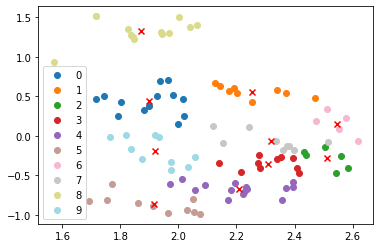

In [93]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(10, pd.DataFrame(X_projected_2D), 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

clust.affiche_resultat(pd.DataFrame(X_projected_2D),les_centres,l_affectation)

#### Pour K = 15 :

In [72]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(15, X, 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

s = 0
for (k,v) in l_affectation.items() : 
  target = y.iloc[v]
  s += sum(np.array(target) == k)

print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))

Iteration 1 Inertie : 51283868.62621702 Différence : 5531310.7523505315
Iteration 2 Inertie : 49215400.38592687 Différence : 2068468.24029015
Iteration 3 Inertie : 48381744.514965884 Différence : 833655.8709609881
Iteration 4 Inertie : 47943402.02069091 Différence : 438342.49427497387
Iteration 5 Inertie : 47541506.61504031 Différence : 401895.4056506008
Iteration 6 Inertie : 47104580.92730051 Différence : 436925.68773979694
Iteration 7 Inertie : 46473590.65704215 Différence : 630990.2702583596
Iteration 8 Inertie : 44981726.69896012 Différence : 1491863.9580820352
Iteration 9 Inertie : 41929561.25756922 Différence : 3052165.4413908944
Iteration 10 Inertie : 40304226.79136853 Différence : 1625334.4662006944
Iteration 11 Inertie : 39810528.69828196 Différence : 493698.0930865705
Iteration 12 Inertie : 39628028.667591006 Différence : 182500.03069095314
Iteration 13 Inertie : 39512963.16287174 Différence : 115065.5047192648
Iteration 14 Inertie : 39468287.832129456 Différence : 44675.3307

/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/1001681415.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/1001681415.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))


##### Visualisation

Iteration 1 Inertie : 1.674434618369174 Différence : 0.16216572324954948
Iteration 2 Inertie : 1.5619262151737785 Différence : 0.11250840319539557
Iteration 3 Inertie : 1.5619262151737785 Différence : 0.0
Affichage des centres: 
 [[ 1.8618654   0.42849097]
 [ 2.10583148  0.63010551]
 [ 2.56299415 -0.37576714]
 [ 2.31025526 -0.35014364]
 [ 2.20725236 -0.66829765]
 [ 1.76968437 -0.77110286]
 [ 2.55608242  0.10946541]
 [ 2.42568574 -0.15816058]
 [ 1.89500366  1.35807744]
 [ 1.95835057 -0.31097467]
 [ 2.3892725   0.47528283]
 [ 1.93924468  0.07371423]
 [ 2.24479849 -0.01512433]
 [ 1.56996018  0.93744953]
 [ 2.01460857 -0.92277996]]
Affichage des affectations: 
 {0: [3, 37, 69, 71, 77, 83, 94, 96, 97], 1: [1, 21, 31, 49, 53, 62, 72], 2: [50, 81, 98], 3: [5, 13, 19, 27, 32, 35, 45, 48, 91, 92], 4: [4, 8, 9, 12, 28, 29, 44, 51, 55, 58, 63, 86, 89, 95, 99], 5: [38, 68, 78, 85], 6: [11, 20, 22, 26], 7: [16, 47, 60, 70, 79, 80, 88, 93], 8: [2, 6, 10, 14, 34, 36, 43, 56, 64, 65, 66, 67], 9: [0, 4

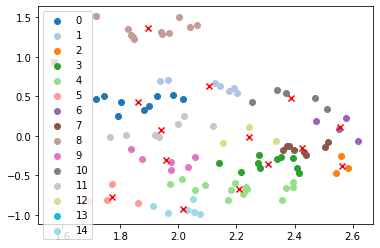

In [95]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(15, pd.DataFrame(X_projected_2D), 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

clust.affiche_resultat(pd.DataFrame(X_projected_2D),les_centres,l_affectation)

#### Pour K = 20 :

In [74]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(20, X, 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

s = 0
for (k,v) in l_affectation.items() : 
  target = y.iloc[v]
  s += sum(np.array(target) == k)

print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))

Iteration 1 Inertie : 42638178.82623028 Différence : 7631586.711475171
Iteration 2 Inertie : 39967850.249944106 Différence : 2670328.5762861744
Iteration 3 Inertie : 38079102.51409061 Différence : 1888747.7358534932
Iteration 4 Inertie : 36662208.30565188 Différence : 1416894.2084387317
Iteration 5 Inertie : 36300500.63728589 Différence : 361707.6683659926
Iteration 6 Inertie : 36206678.06343131 Différence : 93822.57385458052
Iteration 7 Inertie : 36115289.72255689 Différence : 91388.34087441862
Iteration 8 Inertie : 35963682.77552861 Différence : 151606.9470282793
Iteration 9 Inertie : 35812383.58526989 Différence : 151299.19025871903
Iteration 10 Inertie : 35595488.52593556 Différence : 216895.05933433026
Iteration 11 Inertie : 35301006.52463219 Différence : 294482.0013033673
Iteration 12 Inertie : 35048562.22067471 Différence : 252444.30395748466
Iteration 13 Inertie : 34821236.60765824 Différence : 227325.61301647127
Iteration 14 Inertie : 34669948.31878905 Différence : 151288.2888

/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/3086264743.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Result: %d out of %d samples were correctly labeled." % (s, y.size))
/var/folders/dk/5xxlbv9n6xngmfm92w8343_40000gp/T/ipykernel_24133/3086264743.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy score: {0:0.2f}'. format(int(s)/float(y.size)))


##### Visualisation

Iteration 1 Inertie : 1.3451735298067253 Différence : 0.18809695610775967
Iteration 2 Inertie : 1.1690660320022868 Différence : 0.17610749780443857
Iteration 3 Inertie : 1.1600955900181626 Différence : 0.008970441984124111
Affichage des centres: 
 [[ 1.97475695  0.49863923]
 [ 2.07235447  0.66117222]
 [ 2.56299415 -0.37576714]
 [ 2.31025526 -0.35014364]
 [ 2.37948789 -0.67529832]
 [ 1.80498485 -0.8428085 ]
 [ 2.55608242  0.10946541]
 [ 2.42568574 -0.15816058]
 [ 1.89500366  1.35807744]
 [ 1.95498843 -0.28791882]
 [ 2.35537257  0.5646964 ]
 [ 1.93924468  0.07371423]
 [ 2.24479849 -0.01512433]
 [ 1.56996018  0.93744953]
 [ 2.03475075 -0.92889844]
 [ 1.93219495 -0.54756174]
 [ 2.49106468  0.41173483]
 [ 1.80541962  0.39341684]
 [ 2.17887902 -0.68496037]
 [ 2.21084533  0.50947638]]
Affichage des affectations: 
 {0: [37, 77, 83], 1: [1, 21, 49, 53, 72], 2: [50, 81, 98], 3: [5, 13, 19, 27, 32, 35, 45, 48, 91, 92], 4: [28, 29, 55, 63], 5: [38, 39, 68, 85], 6: [11, 20, 22, 26], 7: [16, 47, 60,

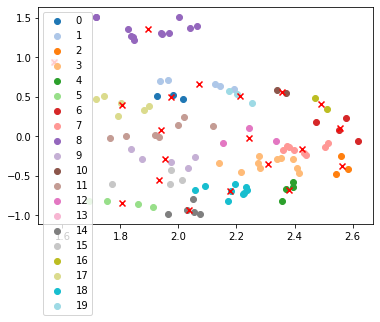

In [97]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(20, pd.DataFrame(X_projected_2D), 0.05, 100)

print("Affichage des centres: \n",les_centres)
print("Affichage des affectations: \n",l_affectation)

clust.affiche_resultat(pd.DataFrame(X_projected_2D),les_centres,l_affectation)

## Conclusion

Dans ce projet, on a implémenté l'algorithme de clustering hiérarchique et l'algorithme de K-moyennes. En général, les programmes marchent parfaitement sur toutes tailles de données et renvoient de bonnes résultats pour l'apprentissage non-supervisé de la base Pen-Based Recognition of Handwritten Digits. 

Pour l'algorithme des K-moyennes, comme la version de la fonction qui calcule l'inertie n'est pas adaptée pour chaque valeur de K dans l'algorithme de K-moyennes, on va utiliser la classe `KMeans` de la librairie `sklearn.cluster`. Avec l'application de la méthode de coude, on a constaté que $k=10$ est le meilleur nombre de clusters pour effectuer les calculs des K-moyennes. Pourtant, on a constaté que le modèle a une inertie très élevée de 16348.8518. Par conséquent, ce n'est pas un bon ajustement du modèle aux données.

Après l'application avec plusieurs valeurs de $k$, dont $k\in\{8,10,15,20\}$, on trouve que $k=10$ renvoit le meilleur taux d'accuracy de $0.24$, tandis que pour les autres valeurs de $k$, les taux d'accuracy varient entre $0.17$ à $0.20$.

---